# References:

### Datasets used here

https://github.com/twinters/jokejudger-data/tree/master


### Paper and code to collect the data

https://thomaswinters.be/paper/2018dapi - https://github.com/twinters/jokejudger

### Read the Jokejudger dataset

In [1]:
import numpy as np
import pandas as pd
import ast

In [2]:
human = pd.read_csv('human_TAB.csv', sep='\t')


### Check the dataset

In [3]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0
...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0


In [4]:
for i in range(3):
    print ("I like", human.x[i], human.z[i])
    print ("I like", human.y[i], human.z[i])
    print()

I like men cheap with a toy on the side
I like McDonalds cheap with a toy on the side

I like boyfriends a little rough with a happy ending
I like adventure movies a little rough with a happy ending

I like entendres doubled
I like penetrations doubled



### Add a column with the average score

In [5]:
human['average_score'] = human['score'].apply(lambda x: sum(ast.literal_eval(x)) / len(ast.literal_eval(x)))

In [6]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529
...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111


# Calculate meaning distance

### MODEL all-MiniLM-L6-v2

In [102]:
from sentence_transformers import SentenceTransformer, util

# Load the all-MiniLM-L6-v2 model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')




In [103]:
def cosine_similarity_between_word_and_sentence(sentence, word):

    # Generate embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    word_embedding = model.encode(word, convert_to_tensor=True)
    
    # Compute cosine similarity
    similarity = util.cos_sim(sentence_embedding, word_embedding)

    return similarity
    

In [104]:
# Define the sentence and the target word
sentence = "The quick brown fox jumps over the lazy dog."
target_word = "jumps"
similarity = cosine_similarity_between_word_and_sentence(sentence, target_word)
print(f"Cosine Similarity between the word '{target_word}' and the sentence: {similarity.item():.4f}")

Cosine Similarity between the word 'jumps' and the sentence: 0.3710


### MODEL OpenAi

In [24]:
import openai
import numpy as np

# Set your OpenAI API key
# openai.api_key = ...

def get_embedding(text, model="text-embedding-3-small"):
    """
    Fetch the embedding for a given text using OpenAI's updated embedding API.
    """
    response = openai.embeddings.create(
        input=text,
        model=model
    )
    # Access the embeddings from the response's 'data' attribute
    return response.data[0].embedding
    #return np.array(response['data'][0]['embedding'])


def cosine_similarity_between_word_and_sentence(sentence, word):

    # Generate embeddings
    sentence_embedding = get_embedding(sentence, model="text-embedding-3-small")
    word_embedding = get_embedding(word, model="text-embedding-3-small")
    
    # Compute cosine similarity
    cosine_similarity = np.dot(sentence_embedding, word_embedding) / (
        np.linalg.norm(sentence_embedding) * np.linalg.norm(word_embedding)
    )

    return cosine_similarity
    



### Add a column with cosine similarities OpenAi

In [40]:

for i in range(len(human)):
    sentence_1a = "I like " + human.x[i]
    sentence_1b = human.z[i]

    sentence_2a = "I like " + human.y[i]
    sentence_2b = human.z[i]

    print (sentence_1a)
    print (sentence_1b)
    print (sentence_2a)
    print (sentence_2b)

    similarity = cosine_similarity_between_word_and_sentence(sentence_1a, sentence_1b)
    print(f"Cosine Similarity between '{sentence_1a}' and '{sentence_1b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_x_z_openai'] = similarity
    
    similarity = cosine_similarity_between_word_and_sentence(sentence_2a, sentence_2b)
    print(f"Cosine Similarity between '{sentence_2a}' and '{sentence_2b}': {similarity.item():.4f}")
    human.loc[i, 'cos_similarity_y_z_openai'] = similarity
    #human['cos_similarity_y_z'][i] = similarity

    print()




I like men
cheap with a toy on the side
I like McDonalds
cheap with a toy on the side
Cosine Similarity between 'I like men' and 'cheap with a toy on the side': 0.0949
Cosine Similarity between 'I like McDonalds' and 'cheap with a toy on the side': 0.2119

I like boyfriends
a little rough with a happy ending
I like adventure movies
a little rough with a happy ending
Cosine Similarity between 'I like boyfriends' and 'a little rough with a happy ending': 0.2457
Cosine Similarity between 'I like adventure movies' and 'a little rough with a happy ending': 0.2496

I like entendres
doubled
I like penetrations
doubled
Cosine Similarity between 'I like entendres' and 'doubled': 0.1659
Cosine Similarity between 'I like penetrations' and 'doubled': 0.1641

I like men
bound in leather
I like books
bound in leather
Cosine Similarity between 'I like men' and 'bound in leather': 0.1288
Cosine Similarity between 'I like books' and 'bound in leather': 0.2015

I like coffee
free
I like slaves
free
Cosi

In [41]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,cos_similarity_x_z_openai,cos_similarity_y_z_openai
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889,0.094874,0.211936
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059,0.245670,0.249587
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714,0.165928,0.164123
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444,0.128757,0.201525
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529,0.144526,0.189984
...,...,...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000,0.238799,0.307379
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053,0.266943,0.499946
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895,0.122844,0.189974
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111,0.138110,0.323565


In [42]:
human.to_csv("human_avgscore_cosinesim-openai.csv", encoding='utf-8', index=False)

### Add a column with cosine similarities all-MiniLM-L6-v2

In [59]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# This is the same function as above
def cosine_similarity_between_word_and_sentence(sentence, word):

    # Generate embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    word_embedding = model.encode(word, convert_to_tensor=True)
    
    # Compute cosine similarity
    similarity = util.cos_sim(sentence_embedding, word_embedding)

    return similarity
    




In [73]:
human["cos_similarity_x_z_allmini"] = 0
human["cos_similarity_y_z_allmini"] = 0

In [74]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,cos_similarity_x_z_openai,cos_similarity_y_z_openai,cos_similarity_x_z_allmini,cos_similarity_y_z_allmini
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889,0.094874,0.211936,0,0
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059,0.245670,0.249587,0,0
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714,0.165928,0.164123,0,0
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444,0.128757,0.201525,0,0
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529,0.144526,0.189984,0,0
...,...,...,...,...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000,0.238799,0.307379,0,0
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053,0.266943,0.499946,0,0
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895,0.122844,0.189974,0,0
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111,0.138110,0.323565,0,0


In [81]:
for i in range(len(human)):
    sentence_1a = "I like " + human.x[i]
    sentence_1b = human.z[i]

    sentence_2a = "I like " + human.y[i]
    sentence_2b = human.z[i]

    print (sentence_1a)
    print (sentence_1b)
    print (sentence_2a)
    print (sentence_2b)

    similarity = cosine_similarity_between_word_and_sentence(sentence_1a, sentence_1b)
    print(f"Cosine Similarity between '{sentence_1a}' and '{sentence_1b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_x_z_allmini'] = float(similarity)
    #human['cos_similarity_x_z_allmini'][i] = similarity
    
    similarity = cosine_similarity_between_word_and_sentence(sentence_2a, sentence_2b)
    print(f"Cosine Similarity between '{sentence_2a}' and '{sentence_2b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_y_z_allmini'] = float(similarity)
    #human['cos_similarity_y_z'][i] = similarity

    print()

I like men
cheap with a toy on the side
I like McDonalds
cheap with a toy on the side
Cosine Similarity between 'I like men' and 'cheap with a toy on the side': 0.0603
Cosine Similarity between 'I like McDonalds' and 'cheap with a toy on the side': 0.0874

I like boyfriends
a little rough with a happy ending
I like adventure movies
a little rough with a happy ending
Cosine Similarity between 'I like boyfriends' and 'a little rough with a happy ending': 0.0906
Cosine Similarity between 'I like adventure movies' and 'a little rough with a happy ending': 0.2615

I like entendres
doubled
I like penetrations
doubled
Cosine Similarity between 'I like entendres' and 'doubled': 0.0818
Cosine Similarity between 'I like penetrations' and 'doubled': 0.1228

I like men
bound in leather
I like books
bound in leather
Cosine Similarity between 'I like men' and 'bound in leather': 0.0952
Cosine Similarity between 'I like books' and 'bound in leather': 0.1031

I like coffee
free
I like slaves
free
Cosi

In [82]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,cos_similarity_x_z_openai,cos_similarity_y_z_openai,cos_similarity_x_z_allmini,cos_similarity_y_z_allmini
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889,0.094874,0.211936,0.060329,0.087431
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059,0.245670,0.249587,0.090556,0.261464
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714,0.165928,0.164123,0.081797,0.122832
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444,0.128757,0.201525,0.095185,0.103097
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529,0.144526,0.189984,0.185047,0.168820
...,...,...,...,...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000,0.238799,0.307379,0.180646,0.421264
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053,0.266943,0.499946,0.288041,0.524635
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895,0.122844,0.189974,0.106464,0.229754
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111,0.138110,0.323565,0.06693,0.328701


In [83]:
human.to_csv("human_avgscore_cosinesim-openai-allmini.csv", encoding='utf-8', index=False)

# Visualise data

In [84]:
import matplotlib.pyplot as plt

# Input data
data = human.values.tolist()


In [85]:
data

[['men',
  'McDonalds',
  'cheap with a toy on the side',
  '[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]',
  0,
  0,
  3.388888888888889,
  0.09487411796188915,
  0.2119355477048008,
  0.06032944098114967,
  0.08743102103471756],
 ['boyfriends',
  'adventure movies',
  'a little rough with a happy ending',
  '[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]',
  0,
  0,
  3.6470588235294117,
  0.24567048209757048,
  0.2495868359140443,
  0.09055642783641815,
  0.2614636719226837],
 ['entendres',
  'penetrations',
  'doubled',
  '[1,2,2,2,3,3,3,3,4,4,4,5,5,5]',
  1,
  0,
  3.2857142857142856,
  0.1659282449467017,
  0.16412284744532155,
  0.08179709315299988,
  0.12283199280500412],
 ['men',
  'books',
  'bound in leather',
  '[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]',
  0,
  0,
  3.9444444444444446,
  0.12875736201499727,
  0.20152491098029607,
  0.0951845571398735,
  0.10309682786464691],
 ['coffee',
  'slaves',
  'free',
  '[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]',
  0,
  0,
  2.823529411764706,
  0.1445262496

## OpenAi

### Sum of the cosine distances

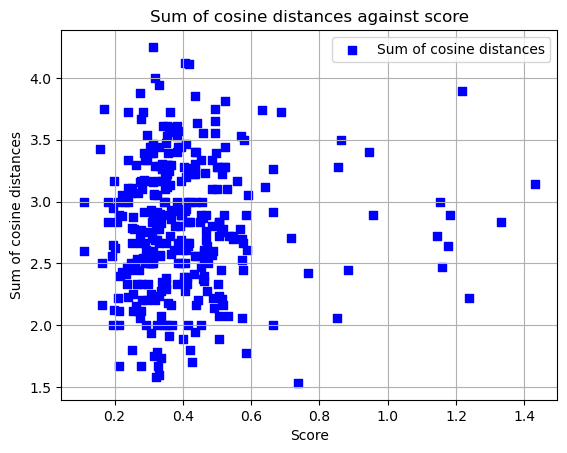

In [90]:

# Extract columns
sum_cosdists = [row[7]+row[8] for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Sum of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Sum of cosine distances")
plt.title("Sum of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Difference of the cosine distances

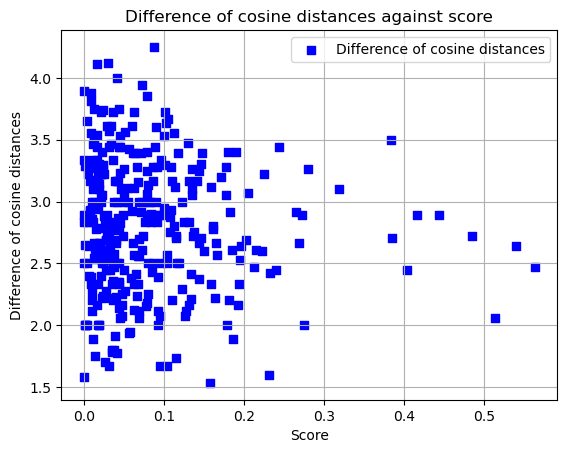

In [91]:

# Extract columns
sum_cosdists = [abs(row[7]-row[8]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Difference of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Difference of cosine distances")
plt.title("Difference of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Average of the cosine distances

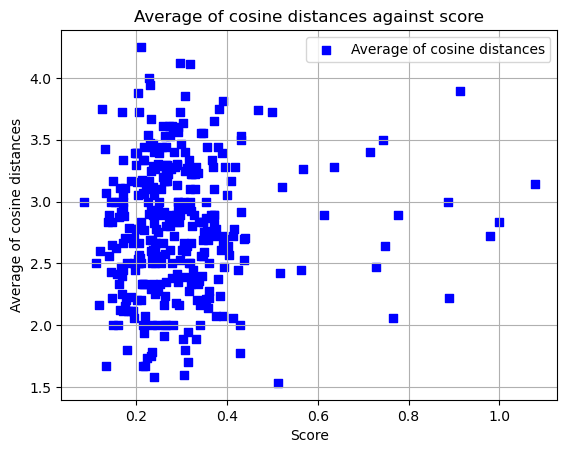

In [92]:

# Extract columns
avg_cosdists = [abs(row[7]+row[8]/2) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(avg_cosdists, rating, label="Average of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Average of cosine distances")
plt.title("Average of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Highest cosine distances (between X-Z and Y-Z)

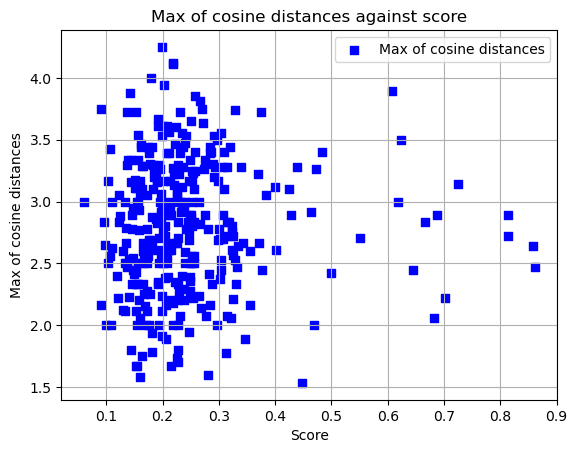

In [94]:

# Extract columns
max_cosdists = [max(row[7],row[8]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(max_cosdists, rating, label="Max of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Max of cosine distances")
plt.title("Max of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Lowest cosine distances (between X-Z and Y-Z)

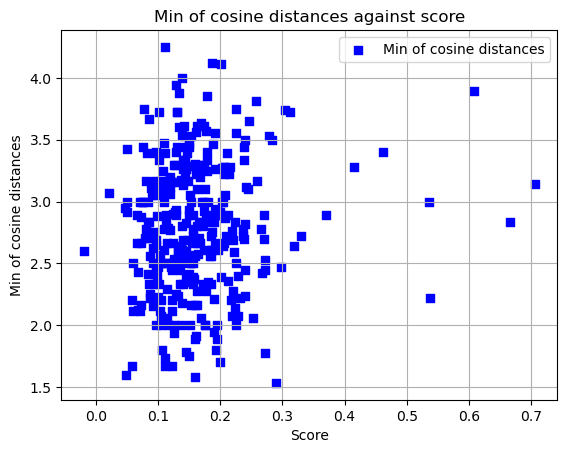

In [95]:

# Extract columns
min_cosdists = [min(row[7],row[8]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(min_cosdists, rating, label="Min of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Min of cosine distances")
plt.title("Min of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### First of the cosine distances (X-Z)

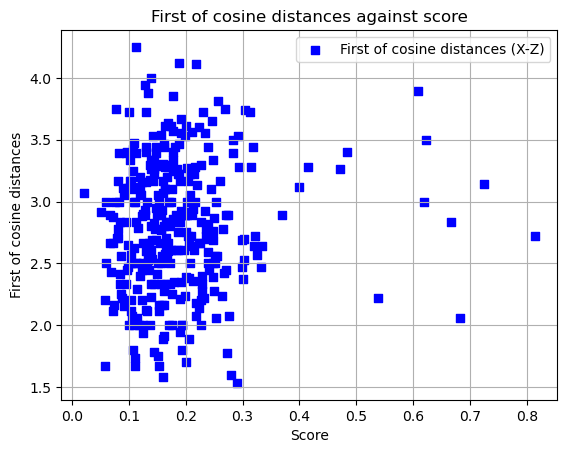

In [98]:

# Extract columns
first_cosdists = [row[7] for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(first_cosdists, rating, label="First of cosine distances (X-Z)", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("First of cosine distances")
plt.title("First of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Second of the cosine distances (Y-Z)

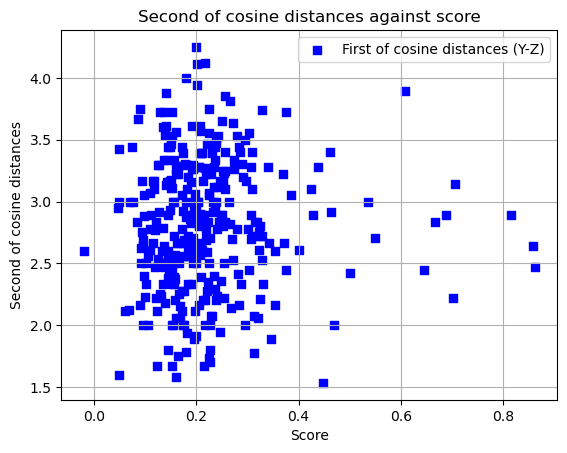

In [100]:

# Extract columns
second_cosdists = [row[8] for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(second_cosdists, rating, label="First of cosine distances (Y-Z)", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Second of cosine distances")
plt.title("Second of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


## cos_similarity_x_z_allmini

### Difference between X-Z and Y-Z

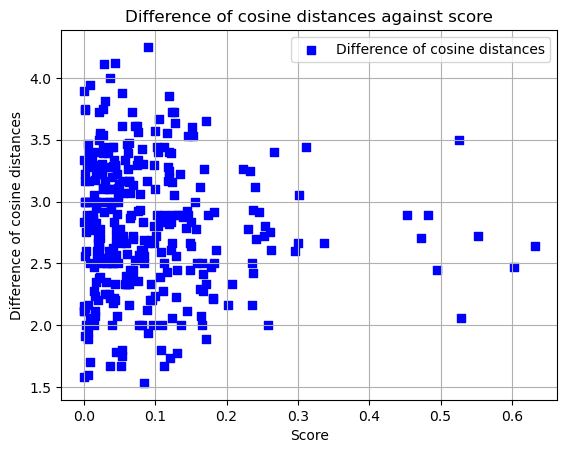

In [101]:

# Extract columns
sum_cosdists = [abs(row[9]-row[10]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Difference of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Difference of cosine distances")
plt.title("Difference of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


# replace X with XZ -- and Y with YZ

### MODEL all-MiniLM-L6-v2 model

In [106]:
# Load the all-MiniLM-L6-v2 model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


def cosine_similarity_between_word_and_sentence(sentence, word):

    # Generate embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    word_embedding = model.encode(word, convert_to_tensor=True)
    
    # Compute cosine similarity
    similarity = util.cos_sim(sentence_embedding, word_embedding)

    return similarity

In [107]:
for i in range(len(human)):
    sentence_1a = "I like " + human.x[i] + ", " + human.z[i]
    sentence_1b = human.z[i]

    sentence_2a = "I like " + human.y[i] + ", " + human.z[i]
    sentence_2b = human.z[i]

    print (sentence_1a)
    print (sentence_1b)
    print (sentence_2a)
    print (sentence_2b)

    similarity = cosine_similarity_between_word_and_sentence(sentence_1a, sentence_1b)
    print(f"Cosine Similarity between '{sentence_1a}' and '{sentence_1b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_xz_z_allmini'] = float(similarity)
    #human['cos_similarity_x_z_allmini'][i] = similarity
    
    similarity = cosine_similarity_between_word_and_sentence(sentence_2a, sentence_2b)
    print(f"Cosine Similarity between '{sentence_2a}' and '{sentence_2b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_yz_z_allmini'] = float(similarity)
    #human['cos_similarity_y_z'][i] = similarity

    print()

I like men, cheap with a toy on the side
cheap with a toy on the side
I like McDonalds, cheap with a toy on the side
cheap with a toy on the side
Cosine Similarity between 'I like men, cheap with a toy on the side' and 'cheap with a toy on the side': 0.5738
Cosine Similarity between 'I like McDonalds, cheap with a toy on the side' and 'cheap with a toy on the side': 0.5495

I like boyfriends, a little rough with a happy ending
a little rough with a happy ending
I like adventure movies, a little rough with a happy ending
a little rough with a happy ending
Cosine Similarity between 'I like boyfriends, a little rough with a happy ending' and 'a little rough with a happy ending': 0.5735
Cosine Similarity between 'I like adventure movies, a little rough with a happy ending' and 'a little rough with a happy ending': 0.6124

I like entendres, doubled
doubled
I like penetrations, doubled
doubled
Cosine Similarity between 'I like entendres, doubled' and 'doubled': 0.5238
Cosine Similarity betwe

In [110]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,cos_similarity_x_z_openai,cos_similarity_y_z_openai,cos_similarity_x_z_allmini,cos_similarity_y_z_allmini,cos_similarity_xz_z_allmini,cos_similarity_yz_z_allmini
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889,0.094874,0.211936,0.060329,0.087431,0.573751,0.549467
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059,0.245670,0.249587,0.090556,0.261464,0.573453,0.612433
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714,0.165928,0.164123,0.081797,0.122832,0.523782,0.483282
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444,0.128757,0.201525,0.095185,0.103097,0.654165,0.604890
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529,0.144526,0.189984,0.185047,0.168820,0.489527,0.365116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000,0.238799,0.307379,0.180646,0.421264,0.716553,0.715391
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053,0.266943,0.499946,0.288041,0.524635,0.849626,0.915052
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895,0.122844,0.189974,0.106464,0.229754,0.613787,0.631691
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111,0.138110,0.323565,0.06693,0.328701,0.585701,0.669384


### Difference between XZ-Z and YZ-Z allmini

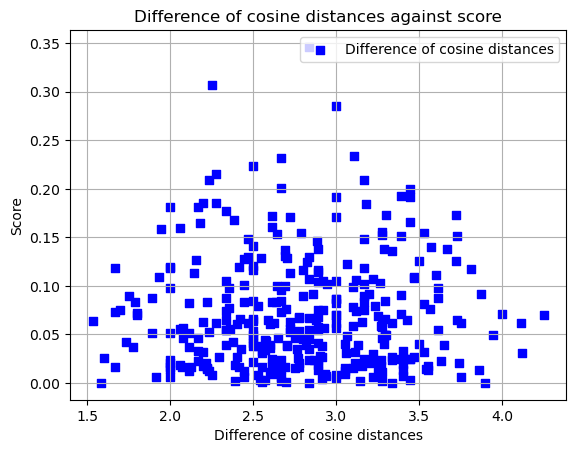

In [119]:
data = human.values.tolist()

# Extract columns
diff_cosdists = [abs(row[12]-row[11]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(rating, diff_cosdists, label="Difference of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine distances")
plt.title("Difference of cosine distances against score")
plt.legend()
plt.grid()

# Show plot
plt.show()


# replace X with XZ -- and Y with YZ

### MODEL openai

In [121]:

import openai
import numpy as np

# Set your OpenAI API key
# openai.api_key = ...

def get_embedding(text, model="text-embedding-3-small"):
    """
    Fetch the embedding for a given text using OpenAI's updated embedding API.
    """
    response = openai.embeddings.create(
        input=text,
        model=model
    )
    # Access the embeddings from the response's 'data' attribute
    return response.data[0].embedding
    #return np.array(response['data'][0]['embedding'])



def cosine_similarity_between_word_and_sentence(sentence, word):

    # Generate embeddings
    sentence_embedding = get_embedding(sentence, model="text-embedding-3-small")
    word_embedding = get_embedding(word, model="text-embedding-3-small")
    
    # Compute cosine similarity
    cosine_similarity = np.dot(sentence_embedding, word_embedding) / (
        np.linalg.norm(sentence_embedding) * np.linalg.norm(word_embedding)
    )

    return cosine_similarity
    

In [122]:

for i in range(len(human)):
    sentence_1a = "I like " + human.x[i] + ", " + human.z[i]
    sentence_1b = human.z[i]

    sentence_2a = "I like " + human.y[i] + ", " + human.z[i]
    sentence_2b = human.z[i]

    print (sentence_1a)
    print (sentence_1b)
    print (sentence_2a)
    print (sentence_2b)

    similarity = cosine_similarity_between_word_and_sentence(sentence_1a, sentence_1b)
    print(f"Cosine Similarity between '{sentence_1a}' and '{sentence_1b}': {similarity.item():.4f}")
    human.loc[i,'cos_similarity_xz_z_openai'] = similarity
    
    similarity = cosine_similarity_between_word_and_sentence(sentence_2a, sentence_2b)
    print(f"Cosine Similarity between '{sentence_2a}' and '{sentence_2b}': {similarity.item():.4f}")
    human.loc[i, 'cos_similarity_yz_z_openai'] = similarity
    #human['cos_similarity_y_z'][i] = similarity

    print()


I like men, cheap with a toy on the side
cheap with a toy on the side
I like McDonalds, cheap with a toy on the side
cheap with a toy on the side
Cosine Similarity between 'I like men, cheap with a toy on the side' and 'cheap with a toy on the side': 0.6521
Cosine Similarity between 'I like McDonalds, cheap with a toy on the side' and 'cheap with a toy on the side': 0.6814

I like boyfriends, a little rough with a happy ending
a little rough with a happy ending
I like adventure movies, a little rough with a happy ending
a little rough with a happy ending
Cosine Similarity between 'I like boyfriends, a little rough with a happy ending' and 'a little rough with a happy ending': 0.7023
Cosine Similarity between 'I like adventure movies, a little rough with a happy ending' and 'a little rough with a happy ending': 0.6011

I like entendres, doubled
doubled
I like penetrations, doubled
doubled
Cosine Similarity between 'I like entendres, doubled' and 'doubled': 0.4993
Cosine Similarity betwe

### Difference between XZ-Z and YZ-Z openai

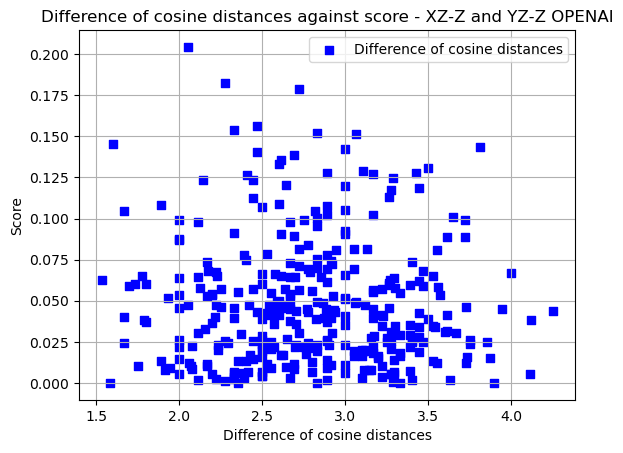

In [123]:
data = human.values.tolist()

# Extract columns
diff_cosdists = [abs(row[14]-row[13]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(rating, diff_cosdists, label="Difference of cosine distances", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine distances")
plt.title("Difference of cosine distances against score - XZ-Z and YZ-Z OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [124]:
human.to_csv("human_all.csv", encoding='utf-8', index=False)